# Installing required libraries

In [4]:
!pip install tika

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32885 sha256=62a336b8b1daa913afc43b38aba548fc36bf4d35ba7975fc9a451c7ca2c4984f
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika


In [5]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.7MB/s 


In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Importing libraries

In [0]:
# Importing libraries
# import PyPDF2
# import pandas as pd
# import numpy as np
# import re

In [6]:
import warnings
warnings.filterwarnings('ignore')

# !pip install fuzzywuzzy

# importing libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests
# from fuzzywuzzy import fuzz
from tika import parser 

import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk import tokenize
import re
import gensim
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# Using tika parser to extract data from the pdfs

In [0]:
pdf_to_text = {}
for i in range(1,326):
  file_loc = r'/content/drive/My Drive/Sustainable-Peace-Project/PDFs/' + str(i) + '_Text.pdf'
  file_data = parser.from_file(file_loc)
  text = file_data['content']
  pdf_to_text[i] = text
  text = ''

In [0]:
len_of_pdf = []
for i in range(1, 326):
  len_of_pdf.append(len(pdf_to_text[i]))
print(np.mean(len_of_pdf))

70663.94153846154


In [0]:
len(len_of_pdf)

325

In [0]:
processed_texts = {}
for i in range(1, 326):
  text1 = re.sub('[!@#$,"()'':-]', '', pdf_to_text[i].lower())
  text1 = text1.strip('\n')
  processed_texts[i] = text1
  text1 = ''

In [0]:
len_of_pdf = []
for i in range(1, 326):
  len_of_pdf.append(len(processed_texts[i]))
print(np.mean(len_of_pdf))

68810.68307692307


In [0]:
pdf_df = pd.DataFrame(processed_texts.items(), columns=['FileName', 'Text'])
pdf_df.head()

,FileName,Text
0,1,civil society and peace negotiations confronti...
1,2,the women and peace hypothesis? the effect of ...
2,3,the women and peace hypothesis? the effect of ...
3,4,international environmental cooperation under ...
4,5,pii 0010782487900576\n\n\ncontraception \n\nen...


In [0]:
pdf_df.shape

(325, 2)

In [0]:
# locally storing all the data to a csv file 
pdf_df.to_csv('final_pdf_text.csv')
!cp final_pdf_text.csv "/content/drive/My Drive/Sustainable-Peace-Project"

# Understanding the text

In [0]:
full_text = ''
for i in range(1, 326):
  full_text = full_text + ' ' + processed_texts[i]

In [0]:
negative_words = ["no", "not", "not any", "none", "never", "neither", "nor", "few", "hardly", "little", "scarcely", "rarely", "seldom", "isn't", "don't", "can't", "hadn't"]
eng_words = set(nltk.corpus.words.words())

my_stopwords = set(ENGLISH_STOP_WORDS)
for i in negative_words:
  try:
    my_stopwords.remove(i)
  except:
    continue

# preprocessing with the text
def preprocess_text(text):
    text = re.sub('[!@#$,"()'':-]', '', text.lower())
    sentences = tokenize.sent_tokenize(text)
    words = []
    temp = []
    for x in sentences:
        temp = x.split(' ')
        temp = [x for x in temp if not x in my_stopwords] # removing stop words
        temp = [x.strip('.') for x in temp] 
        temp = [x.strip('&') for x in temp]
        temp = [x.strip('=') for x in temp]
        temp = [x for x in temp if x.lower() in eng_words or not x.isalpha()]
        temp = [x.strip('') for x in temp]
        temp = filter(None, temp)
        words.append(list(temp))
        temp = []
    return(words)

In [0]:
text_to_words = preprocess_text(full_text)
len(text_to_words)

155599

In [0]:
# removing useless words
flat_list = []
for sublist in text_to_words:
    for item in sublist:
        if len(item) > 2 and (item.isalpha() == True):
            flat_list.append(item)

In [0]:
len(flat_list)

904148

In [0]:
counts = Counter(flat_list)

In [0]:
top_unigrams = counts.most_common(500)

In [0]:
len(top_unigrams)

500

# Understanding n-grams

In [0]:
my_bigrams = nltk.bigrams(flat_list)
count_bigrams = Counter(my_bigrams)
top_bigrams = count_bigrams.most_common(500)

In [0]:
my_trigrams = nltk.trigrams(flat_list)
count_trigrams = Counter(my_trigrams)
top_trigrams = count_trigrams.most_common(500)

In [0]:
final_df = pd.DataFrame(top_unigrams, columns = ['Unigram', 'Unigram_count'])
final_df['Bigram'] = [x[0] for x in top_bigrams]
final_df['Bigram_count'] = [x[1] for x in top_bigrams]
final_df['Trigram'] = [x[0] for x in top_trigrams]
final_df['Trigram_count'] = [x[1] for x in top_trigrams]

In [0]:
final_df.head()

,Unigram,Unigram_count,Bigram,Bigram_count,Trigram,Trigram_count
0,social,11200,"(social, psychology)",2563,"(personality, social, psychology)",1063
1,not,9914,"(use, subject)",1960,"(journal, personality, social)",747
2,conflict,8126,"(new, york)",1660,"(content, tue, use)",720
3,group,6287,"(personality, social)",1360,"(tue, use, subject)",720
4,peace,5319,"(university, press)",1220,"(content, wed, use)",672


In [0]:
final_df.shape

(500, 6)

In [0]:
# locally storing all the top ngrams to a csv file 
final_df.to_csv('top_ngrams.csv')
!cp top_ngrams.csv "/content/drive/My Drive/Sustainable-Peace-Project"

# KMeans Clustering using TF-IDF Vectorizer

In [0]:
data_tfidf = []
for i in range(1, 326):
  data_tfidf.append(processed_texts[i])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3), stop_words = my_stopwords)

X = tfidf.fit_transform(data_tfidf)
# feature_names = np.array(tfidf.get_feature_names())

In [0]:
# converting a sparse matrix to a dataframe
import scipy.sparse
X_df = pd.DataFrame.sparse.from_spmatrix(X)

In [0]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,81283,81284,81285,81286,81287,81288,81289,81290,81291,81292,81293,81294,81295,81296,81297,81298,81299,81300,81301,81302,81303,81304,81305,81306,81307,81308,81309,81310,81311,81312,81313,81314,81315,81316,81317,81318,81319,81320,81321,81322
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042043,0.054656,0.025226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X_df_new = X_df.drop_duplicates(subset=None, keep='first', inplace=False)
X_df_new.shape

(300, 81323)

In [0]:
# applying KMeans to the above dataset
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_df_new)

In [0]:
km.inertia_

264.3015629574733

In [0]:
km.labels_

array([2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0], d

In [0]:
# getting the top terms per cluster

# extracting feature names
feature_names = np.array(tfidf.get_feature_names())

In [0]:
cluster_centroids = pd.DataFrame(km.cluster_centers_, columns=feature_names)

In [0]:
for index, row in cluster_centroids.iterrows():
  print('Top words in cluster = ' + str(index))
  print(row.sort_values(ascending=False)[:20])
  print('----------------------')

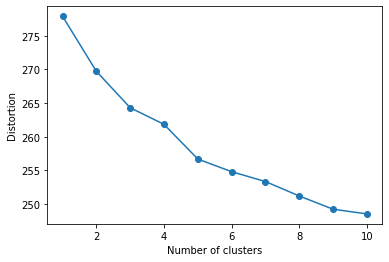

In [0]:
# checking if we have a good number of clusters - 

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_df_new)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [0]:
# finding the sentiment of the top 500 words in each cluster using VADER Sentiment Analyser

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

In [0]:
sid_obj.polarity_scores('peace')

{'compound': 0.5423, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [0]:
# store the top 500 words from each cluster
top_words = []

for index, row in cluster_centroids.iterrows():
  temp = row.sort_values(ascending=False)[:500]
  top_words.append(temp.index)

In [0]:
result = []
neg = []
pos = []
for i in top_words:
  temp = {}
  temp['neg'] = 0
  temp['neu'] = 0
  temp['pos'] = 0
  temp['comp'] = 0
  temp_neg = []
  temp_pos = []
  for j in i:
    sid_dict = sid_obj.polarity_scores(j)
    temp['comp'] += sid_dict['compound']
    if sid_dict['neg'] == 1.0:
      temp['neg'] += 1
      temp_neg.append(j)
    elif sid_dict['neu'] == 1.0:
      temp['neu'] += 1
    elif sid_dict['pos'] == 1.0:
      temp['pos'] += 1
      temp_pos.append(j)
  result.append(temp)
  neg.append(temp_neg)
  pos.append(temp_pos)

In [0]:
result[0]

{'comp': 1.3563000000000007, 'neg': 25, 'neu': 443, 'pos': 32}

In [0]:
result[1]

{'comp': -9.123199999999999, 'neg': 42, 'neu': 435, 'pos': 23}

In [0]:
result[2]

{'comp': 4.212300000000002, 'neg': 22, 'neu': 438, 'pos': 40}

# LDA using Gensim

In [0]:
def prepare_text_for_lda(tokens):
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in my_stopwords]
    # tokens = [get_lemma(token) for token in tokens]
    return tokens

In [0]:
text_for_lda = []
for text in text_to_words:
    text_for_lda.append(prepare_text_for_lda(text))

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(text_for_lda)
corpus = [dictionary.doc2bow(text) for text in text_for_lda]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('/content/drive/My Drive/Sustainable-Peace-Project/dictionary.gensim')

In [0]:
# finding three main topics

NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('/content/drive/My Drive/Sustainable-Peace-Project/ldamodel.gensim')

In [0]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.034*"social" + 0.018*"journal" + 0.017*"psychology" + 0.015*"permission" + 0.012*"school" + 0.011*"university" + 0.010*"personality" + 0.010*"northern" + 0.009*"copyright" + 0.008*"research"')
(1, '0.017*"contact" + 0.010*"positive" + 0.008*"effects" + 0.008*"group" + 0.008*"negative" + 0.008*"prejudice" + 0.008*"effect" + 0.008*"study" + 0.007*"identity" + 0.007*"model"')
(2, '0.009*"people" + 0.007*"conflict" + 0.006*"violence" + 0.005*"political" + 0.005*"group" + 0.004*"important" + 0.004*"community" + 0.004*"support" + 0.004*"research" + 0.004*"peace"')


In [0]:
topics[0]

(0,
 '0.034*"social" + 0.018*"journal" + 0.017*"psychology" + 0.015*"permission" + 0.012*"school" + 0.011*"university" + 0.010*"personality" + 0.010*"northern" + 0.009*"copyright" + 0.008*"research"')

# LDA Using sklearn

In [0]:
data_tfidf = []
for i in range(1, 326):
  data_tfidf.append(processed_texts[i])

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_features = 10000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2, max_features=no_features, stop_words=my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(data_tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=2, max_features=no_features, stop_words=my_stopwords)
tf = tf_vectorizer.fit_transform(data_tfidf)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 3

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [0]:
no_top_words = 10
print(display_topics(nmf, tfidf_feature_names, no_top_words))

Topic 0:
peace,conflict,jstor,jstor org,https jstor org,https jstor,org terms,jstor org terms,utc,https
Topic 1:
permission,reproduction prohibited,permission copyright,copyright owner reproduction,owner reproduction prohibited,reproduced permission copyright,copyright owner,reproduction prohibited permission,prohibited permission,permission copyright owner
Topic 2:
intergroup,contact,social,outgroup,psychology,group,ingroup,prejudice,participants,intergroup contact
None


In [0]:
print(display_topics(lda, tf_feature_names, no_top_words))

Topic 0:
social,not,conflict,permission,group,students,school,people,use,peace
Topic 1:
social,intergroup,contact,group,psychology,participants,not,al,outgroup,study
Topic 2:
not,peace,political,conflict,social,war,use,groups,group,violence
None


In [0]:
# removing unnecessary words like https etc
remove_words_list = ['https', 'jstor', 'org', 'copyright', 'owner']

processed_texts_1 = {}
for i in range(1, 326):
  text1 = re.sub('[!@#$,"()'':-]', '', pdf_to_text[i].lower())
  text1 = text1.strip('\n')
  querywords = text1.split()

  resultwords  = [word for word in querywords if word.lower() not in remove_words_list]
  text1 = ' '.join(resultwords)
  # text1 = ' '.join(filter(lambda x: x.lower() not in remove_words_list,  text1.split()))
  processed_texts_1[i] = text1
  text1 = ''

In [0]:
data_tfidf = []
for i in range(1, 326):
  data_tfidf.append(processed_texts_1[i])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_features = 10000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2, max_features=no_features, stop_words=my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(data_tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=2, max_features=no_features, stop_words=my_stopwords)
tf = tf_vectorizer.fit_transform(data_tfidf)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 3

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
no_top_words = 20
print('NMF\n')
print(display_topics(nmf, tfidf_feature_names, no_top_words))
print('LDA\n')
print(display_topics(lda, tf_feature_names, no_top_words))

NMF

Topic 0:
peace,conflict,jstor org,jstor,https jstor,https jstor org,org terms,jstor org terms,utc,https,political,not,use subject,use subject https,subject https,subject https jstor,222 107,59 222,128 59,59 222 107
Topic 1:
permission,reproduction prohibited,prohibited permission,reproduced permission owner,owner reproduction prohibited,owner reproduction,reproduction prohibited permission,permission owner reproduction,permission owner,owner,reproduced permission,prohibited,permission reproduced permission,prohibited permission reproduced,permission reproduced,reproduced,reproduction,proquest,______,teacher
Topic 2:
intergroup,contact,social,outgroup,group,psychology,ingroup,prejudice,participants,intergroup contact,forgiveness,not,social psychology,al,trust,attitudes,positive,conflict,groups,journal
None
LDA

Topic 0:
10,not,org,permission,political,conflict,al,peace,doi,social,doi org,org 10,doi org 10,et,et al,http,global,students,study,research
Topic 1:
social,contact,intergro

# Understanding the text better

In [0]:
# preprocess further
preprocess_text_new = []
# print(text_to_words[0])
for sentence in text_to_words:
  temp = []
  for word in sentence:
    word = word.strip('©')
    word = word.rstrip()
    # print(word + ' ' + str(word.isalpha()))

    if word.isalpha() and len(word) > 2:
      temp.append(word)
  preprocess_text_new.append(temp)
  # break
# print(preprocess_text_new[0])

In [0]:
# removing useless words
flat_list = []
for sublist in preprocess_text_new:
    for item in sublist:
        # if len(item) > 2 and (item.isalpha() == True):
        flat_list.append(item)

In [0]:
len(flat_list)

963559

In [0]:
my_bigrams = nltk.bigrams(flat_list)
count_bigrams = Counter(my_bigrams)
top_bigrams = count_bigrams.most_common(10)

In [0]:
top_bigrams

[(('social', 'psychology'), 2642),
 (('use', 'subject'), 1960),
 (('new', 'york'), 1786),
 (('personality', 'social'), 1377),
 (('university', 'press'), 1256),
 (('did', 'not'), 1079),
 (('conflict', 'resolution'), 1060),
 (('journal', 'personality'), 1059),
 (('journal', 'social'), 870),
 (('does', 'not'), 769)]

# Enhancing Lexicons Part 1

In [0]:
# reading the different lexicons and defining negative words
negative_words = ["no", "not", "not any", "none", "never", "neither", "nor", "few", "hardly", "little", "scarcely", "rarely", "seldom", "isn't", "don't", "can't", "hadn't"]

file = '/content/drive/My Drive/Sustainable-Peace-Project/TranslatedLexicon6-8.xlsx'

dfs = pd.read_excel(file, sheet_name = 'Positive Peace Terms')
#preprocessing the peace lexicon words 
dfs = dfs['English'].dropna()
dfs = dfs.str.lower()
dfs = dfs.str.replace("_", " ")
dfs = dfs.str.strip()
peace_lexicon_list = list(dfs)

dfs = pd.read_excel(file, sheet_name = 'Conflict terms')
#preprocessing the conflict lexicon words 
dfs = dfs['English'].dropna()
dfs = dfs.str.lower()
dfs = dfs.str.replace("_", " ")
dfs = dfs.str.strip()
conflict_lexicon_list = list(dfs)

dfs = pd.read_excel(file, sheet_name = 'Resilience Terms')
#preprocessing the conflict lexicon words 
dfs = dfs['English'].dropna()
dfs = dfs.str.lower()
dfs = dfs.str.replace("_", " ")
dfs = dfs.str.strip()
nonPeace_lexicon_list = list(dfs)

In [0]:
# adding new terms to the lexicon
new_peace_words = ['trust',
'empathy',
'united',
'common',
'included',
'democratic',
'complexity',
'learning',
'literature',
'health',
'knowledge',
'communication',
'truth',
'inclusion',
'sustainable',
'integrative',
'positive contact',
'contact effects',
'openness to experience',
'contact theory',
'life expectancy',
'media openness',
'collaborative governance',
'common identity',
'peace vision',
'positive affect',
'global citizenship',
'identification with humanity',
'social learning',
'learning community',
'social support',
'peace durability',
'social trust',
'mutual trust',
'human development']

In [0]:
new_nonpeace_words = ['discussion',
'willingness',
'conflict handling',
'procedural justice',
'peace building',
'secure base',
'international negotiation',
'political tolerance',
'economic growth',
'civic engagement',
'reducing prejudice',
'empathic concern',
'prejudice reduction',
'affirmative action',
'mutual aid',
'truth reconciliation process']

In [0]:
new_conflict_words = ['prejudice',
'bias',
'problem',
'minority',
'risk',
'competition',
'competitive',
'military',
'stereotype',
'trauma',
'negativity',
'negatively',
'intractable',
'security dilemma',
'aggressive behavior',
'armed conflict',
'distinctiveness threat',
'violent conflict',
'civil conflict',
'racial bias',
'negative affect',
'violent behavior',
'social dominance',
'family conflict',
'social conflict',
'international conflict',
'moral exclusion',
'violent video',
'cold war',
'global warming',
'political violence',
'minority group',
'riot exposure',
'childhood punishment',
'generalized prejudice',
'aversive racism',
'dominance orientation',
'horizontal inequality',
'mortality salience',
'collective guilt']

In [0]:
peace_lexicon_list = peace_lexicon_list + new_peace_words

In [0]:
nonPeace_lexicon_list = nonPeace_lexicon_list + new_nonpeace_words

In [0]:
conflict_lexicon_list = conflict_lexicon_list + new_conflict_words

In [0]:
peace_lexicon_list = set(peace_lexicon_list)
nonPeace_lexicon_list = set(nonPeace_lexicon_list)
conflict_lexicon_list = set(conflict_lexicon_list)

## Peace

In [54]:
len(peace_lexicon_list)

525

In [55]:
# converting all bigrams and trigrams of the peace lexicon into unigrams
peace_lexicon_list_1 = []
for term in peace_lexicon_list:
  words = term.split()
  if len(words) == 1:
    peace_lexicon_list_1.append(words[0])
  else:
    peace_lexicon_list_1.append(term)
    peace_lexicon_list_1 = peace_lexicon_list_1 + words
  words = []
len(peace_lexicon_list_1)

1086

In [56]:
peace_lexicon_list_1 = set(peace_lexicon_list_1)
len(peace_lexicon_list_1)

782

In [0]:
peace_dict = {}
for i in peace_lexicon_list_1:
  if i in peace_lexicon_list:
    peace_dict[i] = 'No'
  else:
    peace_dict[i] = 'Yes'

In [58]:
peace_df = pd.DataFrame(peace_dict.items(), columns = ['Term', 'isNew'])
peace_df.groupby('isNew').count()

,Term
isNew,
No,525
Yes,257


In [0]:
# locally storing the new lexicon
peace_df.to_csv('new_peace_lexicon.csv')
!cp new_peace_lexicon.csv "/content/drive/My Drive/Sustainable-Peace-Project"

## Non Peace 

In [59]:
len(nonPeace_lexicon_list)

312

In [60]:
# converting all bigrams and trigrams of the non peace lexicon into unigrams
nonpeace_lexicon_list_1 = []
for term in nonPeace_lexicon_list:
  words = term.split()
  if len(words) == 1:
    nonpeace_lexicon_list_1.append(words[0])
  else:
    nonpeace_lexicon_list_1.append(term)
    nonpeace_lexicon_list_1 = nonpeace_lexicon_list_1 + words
  words = []
len(nonpeace_lexicon_list_1)

750

In [61]:
nonpeace_lexicon_list_1 = set(nonpeace_lexicon_list_1)
len(nonpeace_lexicon_list_1)

566

In [0]:
nonpeace_dict = {}
for i in nonpeace_lexicon_list_1:
  if i in nonPeace_lexicon_list:
    nonpeace_dict[i] = 'No'
  else:
    nonpeace_dict[i] = 'Yes'

In [63]:
nonpeace_df = pd.DataFrame(nonpeace_dict.items(), columns = ['Term', 'isNew'])
nonpeace_df.groupby('isNew').count()

,Term
isNew,
No,312
Yes,254


In [0]:
# locally storing the new lexicon
nonpeace_df.to_csv('new_nonpeace_lexicon.csv')
!cp new_nonpeace_lexicon.csv "/content/drive/My Drive/Sustainable-Peace-Project"

## Conflict

In [64]:
len(conflict_lexicon_list)

453

In [65]:
# converting all bigrams and trigrams of the peace lexicon into unigrams
conflict_lexicon_list_1 = []
for term in conflict_lexicon_list:
  words = term.split()
  if len(words) == 1:
    conflict_lexicon_list_1.append(words[0])
  else:
    conflict_lexicon_list_1.append(term)
    conflict_lexicon_list_1 = conflict_lexicon_list_1 + words
  words = []
len(conflict_lexicon_list_1)

793

In [66]:
conflict_lexicon_list_1 = set(conflict_lexicon_list_1)
len(conflict_lexicon_list_1)

651

In [0]:
conflict_dict = {}
for i in conflict_lexicon_list_1:
  if i in conflict_lexicon_list:
    conflict_dict[i] = 'No'
  else:
    conflict_dict[i] = 'Yes'

In [68]:
conflict_df = pd.DataFrame(conflict_dict.items(), columns = ['Term', 'isNew'])
conflict_df.groupby('isNew').count()

,Term
isNew,
No,453
Yes,198


In [0]:
# locally storing the new lexicon
conflict_df.to_csv('new_conflict_lexicon.csv')
!cp new_conflict_lexicon.csv "/content/drive/My Drive/Sustainable-Peace-Project"

# Enhancing the Lexicon Part 2

In [72]:
# all english words in the dictionary using the nltk package
eng_words = set(nltk.corpus.words.words())
len(eng_words)

235892

In [0]:
# finding the stem of each english word from the text corpus
from collections import defaultdict

vocab = eng_words

d = defaultdict(set)
for v in vocab:
    d[stemmer.stem(v)].add(v)

## Peace

In [0]:
# finding stem words for peace lexicon
peace_dict_enhanced = {}
for i in peace_lexicon_list_1:
  j = i.split()
  if len(j) == 1: # finding the unigram
    k = stemmer.stem(i) # stemming the word
    try:
      peace_dict_enhanced[i] = d[k] # finding other possibilities of the word
    except:
      print(i)
      peace_dict_enhanced[i] = [i]
  else:
    peace_dict_enhanced[i] = [i]

In [115]:
len(peace_dict_enhanced)

782

In [0]:
peace_lexicon_list_2 = []
for key, value in peace_dict_enhanced.items():
    peace_lexicon_list_2 = peace_lexicon_list_2 + list(value)

In [0]:
peace_lexicon_list_2 = peace_lexicon_list_2 + list(peace_lexicon_list_1) # adding terms if they were missed before

In [0]:
peace_lexicon_list_2 = set(peace_lexicon_list_2)

In [162]:
peace_dict = {}
temp = []
for i in sorted(peace_lexicon_list_2):
  if i in peace_lexicon_list:
    peace_dict[i] = 'No'
    temp.append(i)
  else:
    peace_dict[i] = 'Yes'

peace_df = pd.DataFrame(peace_dict.items(), columns = ['Term', 'isNew'])
peace_df.groupby('isNew').count()

,Term
isNew,
No,525
Yes,1818


In [0]:
# locally storing the new lexicon
peace_df.to_csv('enh_peace_lexicon.csv')
!cp enh_peace_lexicon.csv "/content/drive/My Drive/Sustainable-Peace-Project"

## Non-Peace

In [126]:
len(nonpeace_lexicon_list_1)

566

In [0]:
# finding stem words for peace lexicon
nonpeace_dict_enhanced = {}
for i in nonpeace_lexicon_list_1:
  j = i.split()
  if len(j) == 1: # finding the unigram
    k = stemmer.stem(i) # stemming the word
    try:
      nonpeace_dict_enhanced[i] = d[k] # finding other possibilities of the word
    except:
      print(i)
      nonpeace_dict_enhanced[i] = [i]
  else:
    nonpeace_dict_enhanced[i] = [i]

In [125]:
len(nonpeace_dict_enhanced)

566

In [0]:
nonpeace_lexicon_list_2 = []
for key, value in nonpeace_dict_enhanced.items():
    nonpeace_lexicon_list_2 = nonpeace_lexicon_list_2 + list(value)

In [128]:
len(nonpeace_lexicon_list_2)

1891

In [129]:
nonpeace_lexicon_list_2 = nonpeace_lexicon_list_2 + list(nonpeace_lexicon_list_1) # adding terms if they were missed before
nonpeace_lexicon_list_2 = set(nonpeace_lexicon_list_2)
len(nonpeace_lexicon_list_2)

1752

In [160]:
nonpeace_dict = {}
temp = []
for i in sorted(nonpeace_lexicon_list_2):
  if i in nonPeace_lexicon_list:
    nonpeace_dict[i] = 'No'
    temp.append(i)
  else:
    nonpeace_dict[i] = 'Yes'

nonpeace_df = pd.DataFrame(nonpeace_dict.items(), columns = ['Term', 'isNew'])
nonpeace_df.groupby('isNew').count()

,Term
isNew,
No,312
Yes,1440


In [0]:
# locally storing the new lexicon
nonpeace_df.to_csv('enh_nonpeace_lexicon.csv')
!cp enh_nonpeace_lexicon.csv "/content/drive/My Drive/Sustainable-Peace-Project"

## Conflict

In [134]:
len(conflict_lexicon_list_1)

651

In [0]:
# finding stem words for peace lexicon
conflict_dict_enhanced = {}
for i in conflict_lexicon_list_1:
  j = i.split()
  if len(j) == 1: # finding the unigram
    k = stemmer.stem(i) # stemming the word
    try:
      conflict_dict_enhanced[i] = d[k] # finding other possibilities of the word
    except:
      print(i)
      conflict_dict_enhanced[i] = [i]
  else:
    conflict_dict_enhanced[i] = [i]

In [136]:
len(conflict_dict_enhanced)

651

In [0]:
conflict_lexicon_list_2 = []
for key, value in conflict_dict_enhanced.items():
    conflict_lexicon_list_2 = conflict_lexicon_list_2 + list(value)

In [138]:
len(conflict_lexicon_list_2)

2223

In [139]:
conflict_lexicon_list_2 = conflict_lexicon_list_2 + list(conflict_lexicon_list_1) # adding terms if they were missed before
conflict_lexicon_list_2 = set(conflict_lexicon_list_2)
len(conflict_lexicon_list_2)

2016

In [157]:
conflict_dict = {}
temp = []
for i in sorted(conflict_lexicon_list_2):
  if i in conflict_lexicon_list:
    conflict_dict[i] = 'No'
    temp.append(i)
  else:
    conflict_dict[i] = 'Yes'

conflict_df = pd.DataFrame(conflict_dict.items(), columns = ['Term', 'isNew'])
conflict_df.groupby('isNew').count()

,Term
isNew,
No,453
Yes,1563


In [0]:
# locally storing the new lexicon
conflict_df.to_csv('enh_conflict_lexicon.csv')
!cp enh_conflict_lexicon.csv "/content/drive/My Drive/Sustainable-Peace-Project"

# Checking the lexicons

In [0]:
# importing new lexicons
file = '/content/drive/My Drive/Sustainable-Peace-Project/EnhancedLexicons'
new_peace = pd.read_csv(file + '/enh_peace_lexicon.csv')
new_peace_terms = list(new_peace['Term'])

In [0]:
new_nonpeace = pd.read_csv(file + '/enh_nonpeace_lexicon.csv')
new_nonpeace_terms = list(new_nonpeace['Term'])

new_conflict = pd.read_csv(file + '/enh_conflict_lexicon.csv')
new_conflict_terms = list(new_conflict['Term'])

In [22]:
t = len(list(set(new_peace_terms) - set(peace_lexicon_list)))
if (len(new_peace_terms) - t) == len(peace_lexicon_list):
  print('Correct')

Correct


In [23]:
t = len(list(set(new_nonpeace_terms) - set(nonPeace_lexicon_list)))
if (len(new_nonpeace_terms) - t) == len(nonPeace_lexicon_list):
  print('Correct')

Correct


In [24]:
t = len(list(set(new_conflict_terms) - set(conflict_lexicon_list)))
if (len(new_conflict_terms) - t) == len(conflict_lexicon_list):
  print('Correct')

Correct
